#Applied Machine Learning Final Project (TEAM 14)

##Team Members: 
Shreeya Kokate (CWID: 20005256)

Pranavi Vashishtha (CWID: 10459638)

Aniruddha Redij (CWID : 10476618)

# Data Collection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install snscrape

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import itertools
import datetime
import time
import csv
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Import packages
!pip install mglearn
import warnings
warnings.filterwarnings('ignore')
import mglearn
import os
import glob
import pickle

# import method for split train/test data set
from sklearn.model_selection import train_test_split

# import method to calculate metrics
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 540 kB 8.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=7fde88db0b45eaa50d567ef47b25cf93e2dc50cfba10fe50513e66962440f7e1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
# Setting variables to be used below
maxTweets = 10000

# Creating list to append tweet data to
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('stopwar since:2022-02-15 until:2022-03-15 lang:en').get_items()):
    if i>maxTweets:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.username])


In [ ]:
# Creating a dataframe from the tweets list above
data_set = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

# Display first 5 entries from dataframe
data_set.head()

,Datetime,Tweet Id,Text,Username
0,2022-03-14 23:59:24+00:00,1503521205873438721,Russia-Ukraine talks done for the day; EU agre...,PeterBrandt007
1,2022-03-14 23:58:28+00:00,1503520971822706692,It's really heartbreaking! 🙁 Rest in peace! #S...,ahmadmarufS
2,2022-03-14 23:57:40+00:00,1503520771494539264,To Russian people\nPlease believe in her\nPlea...,galaxys23172864
3,2022-03-14 23:51:55+00:00,1503519323943489550,@Toddyspace I support you 👍\n@NobelPrize \n🇺🇦🇪...,ZOTILO2
4,2022-03-14 23:51:08+00:00,1503519125330661381,@InnaVOA I support you 👍\n@NobelPrize \n🇺🇦🇪🇦\n...,ZOTILO2


In [ ]:
# Export dataframe into a CSV
data_set.to_csv('/content/drive/MyDrive/AML Project/MLdata.csv', sep=',', index=False)

# Data Preprocessing 

In [ ]:
# Only use to load dataset
data_set = pd.read_csv('/content/drive/MyDrive/AML Project/MLdata.csv')

In [ ]:
data_set.dtypes

Datetime    object
Tweet Id     int64
Text        object
Username    object
dtype: object

In [ ]:
import numpy as np
import math
import re #regex for string cleaning
import pandas as pd
from bs4 import BeautifulSoup
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#remove duplicated values
data_set.drop_duplicates(inplace=True) 


def load_dict_smileys():

    return {
        ":‑)":"",
        ":-]":"",#"smiley",
        ":-3":"",#"smiley",
        ":->":"",#"smiley",
        "8-)":"",#"smiley",
        ":-}":"",#"smiley",
        ":)":"",#"smiley",
        ":]":"",#"smiley",
        ":3":"",#"smiley",
        ":>":"",#"smiley",
        "8)":"",#"smiley",
        ":}":"",#"smiley",
        ":o)":"",#"smiley",
        }

def load_dict_contractions():

    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        }

# the above said preprocessing functions
##
def remove_url(text):
  return re.sub(r'https?://\S+|www\.\S+', repl=r'', string=text)


def remove_numbers(text):
  return ''.join([c for c in text if not c.isdigit()])


def remove_punct(text):
  return ''.join([c for c in text if c not in string.punctuation])


def remove_stopword(text):
  return ' '.join([word for word in text.split() if word not in stopwords.words('english')])


def correct_spelling(text):
  return str(TextBlob(str(text)).correct())


def do_lemmatize(text):
  return ' '.join([lemmatizer.lemmatize(str(word), "v") for word in text.split()])


def html (text): 
    #Escaping HTML characters
    tweet = BeautifulSoup(text, "lxml").get_text()
    return tweet


def remove_mention (text): 
    # Removing the @
    return re.sub(r"(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", '', string=text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# applying the preprocessing functions one by one
##

# lowercase
data_set['Text'] = data_set['Text'].apply(str.lower)

#remove html
data_set['clean_text'] = data_set['Text'].apply(html)

#remove mentions
data_set['clean_text'] = data_set['clean_text'].apply(remove_mention)

# remove urls
##
data_set['clean_text'] = data_set['clean_text'].apply(remove_url)

# remove numbers
##
data_set['clean_text'] = data_set['clean_text'].apply(remove_numbers)

# remove punctuations
##
data_set['clean_text'] = data_set['clean_text'].apply(remove_punct)

# remove stopwords
##
data_set['clean_text'] = data_set['clean_text'].apply(remove_stopword)

data_set.head()

,Datetime,Tweet Id,Text,Username,clean_text
0,2022-03-14 23:59:24+00:00,1503521205873438721,russia-ukraine talks done for the day; eu agre...,PeterBrandt007,russiaukraine talks done day eu agrees fresh s...
1,2022-03-14 23:58:28+00:00,1503520971822706692,it's really heartbreaking! 🙁 rest in peace! #s...,ahmadmarufS,really heartbreaking 🙁 rest peace
2,2022-03-14 23:57:40+00:00,1503520771494539264,to russian people\nplease believe in her\nplea...,galaxys23172864,russian people please believe please stop war
3,2022-03-14 23:51:55+00:00,1503519323943489550,@toddyspace i support you 👍\n@nobelprize \n🇺🇦🇪...,ZOTILO2,support 👍 🇺🇦🇪🇦
4,2022-03-14 23:51:08+00:00,1503519125330661381,@innavoa i support you 👍\n@nobelprize \n🇺🇦🇪🇦\n...,ZOTILO2,support 👍 🇺🇦🇪🇦


In [ ]:
# lemmatization
##
data_set['text_preprocessed'] = data_set['clean_text'].apply(do_lemmatize)

# remove short words
data_set['text_preprocessed'] = data_set['text_preprocessed'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>3]))

#tokenization 
tokenized_tweet = data_set['text_preprocessed'].apply(lambda x: x.split())

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data_set['text_preprocessed'] = tokenized_tweet

data_set.head()

,Datetime,Tweet Id,Text,Username,clean_text,text_preprocessed
0,2022-03-14 23:59:24+00:00,1503521205873438721,russia-ukraine talks done for the day; eu agre...,PeterBrandt007,russiaukraine talks done day eu agrees fresh s...,russiaukraine talk agree fresh sanction
1,2022-03-14 23:58:28+00:00,1503520971822706692,it's really heartbreaking! 🙁 rest in peace! #s...,ahmadmarufS,really heartbreaking 🙁 rest peace,really heartbreaking rest peace
2,2022-03-14 23:57:40+00:00,1503520771494539264,to russian people\nplease believe in her\nplea...,galaxys23172864,russian people please believe please stop war,russian people please believe please stop
3,2022-03-14 23:51:55+00:00,1503519323943489550,@toddyspace i support you 👍\n@nobelprize \n🇺🇦🇪...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦
4,2022-03-14 23:51:08+00:00,1503519125330661381,@innavoa i support you 👍\n@nobelprize \n🇺🇦🇪🇦\n...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦


In [ ]:
# POS tagger dictionary
pos = data_set['text_preprocessed']
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
stop = stopwords.words('english')
def token_stop_pos(pos):
    tags = pos_tag(pos)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data_set['POS tagged'] = pos.apply(token_stop_pos)
data_set

In [ ]:
data_set = data_set.drop(['POS tagged'],axis=1)
data_set

# Exploratory Data Analysis

In [ ]:
# getting the date column ready for datetime operations
data_set['Datetime']= pd.to_datetime(data_set['Datetime'])

In [ ]:
#Data Visualisation
content_df = data_set['Text']
print(len(content_df))
content_df

10001


0        russia-ukraine talks done for the day; eu agre...
1        it's really heartbreaking! 🙁 rest in peace! #s...
2        to russian people\nplease believe in her\nplea...
3        @toddyspace i support you 👍\n@nobelprize \n🇺🇦🇪...
4        @innavoa i support you 👍\n@nobelprize \n🇺🇦🇪🇦\n...
                               ...                        
9996     booked an airbnb in ukraine to get $ to people...
9997     @tecnifibre @daniilmedwed please, raise your v...
9998     @andreyrublev97 please, raise your voice again...
9999     why its dat nobody ( anyone)  is serious on di...
10000    there is no words for this kind of evil.\n\nwa...
Name: Text, Length: 10001, dtype: object

In [ ]:
tweet_len = []
for contentRow in content_df:
    lengthofTweet = len(contentRow.split())
    tweet_len.append(lengthofTweet)

In [ ]:
data_set.insert(2,"Word Length of Tweet", tweet_len)

In [ ]:
print('Average number of words used per tweet:', round(data_set['Word Length of Tweet'].mean(),2))
print('Spread of number of words used per tweet:',round(data_set['Word Length of Tweet'].std(),2))

Average number of words used per tweet: 24.63
Spread of number of words used per tweet: 12.29


In [ ]:
character_tweet_len = []
for contentRow in content_df:
    lengthofTweet = len(contentRow.split())
    character_tweet_len.append(lengthofTweet)

In [ ]:
data_set.insert(2,"Character Length of Tweet", character_tweet_len)

In [ ]:
print('Average number of words used per tweet:', round(data_set['Character Length of Tweet'].mean(),2))
print('Spread of number of words used per tweet:',round(data_set['Character Length of Tweet'].std(),2))
print('Minimum number of number of words used per tweet:',data_set['Character Length of Tweet'].min())
print('Maximum number of words used per tweet:',data_set['Character Length of Tweet'].max())

Average number of words used per tweet: 24.63
Spread of number of words used per tweet: 12.29
Minimum number of number of words used per tweet: 1
Maximum number of words used per tweet: 61


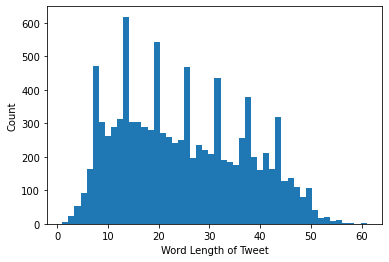

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data_set['Word Length of Tweet'], bins=50)
plt.ylabel('Count')
plt.xlabel('Word Length of Tweet');
plt.show()

In [ ]:
df_1try = data_set.groupby('Datetime')[["Character Length of Tweet","Word Length of Tweet"]].mean()
df_1try

,Character Length of Tweet,Word Length of Tweet
Datetime,,
2022-03-08 05:11:12+00:00,24.0,24.0
2022-03-08 05:12:31+00:00,21.0,21.0
2022-03-08 05:13:31+00:00,24.0,24.0
2022-03-08 05:15:22+00:00,25.0,25.0
2022-03-08 05:16:05+00:00,35.0,35.0
...,...,...
2022-03-14 23:51:08+00:00,9.0,9.0
2022-03-14 23:51:55+00:00,9.0,9.0
2022-03-14 23:57:40+00:00,16.0,16.0


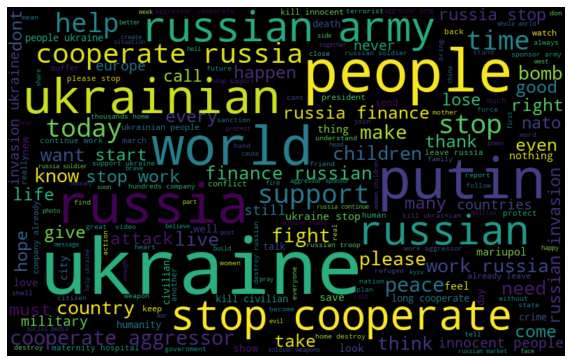

In [ ]:
from wordcloud import WordCloud

all_words_en = ' '.join([text for text in data_set['text_preprocessed']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_en)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

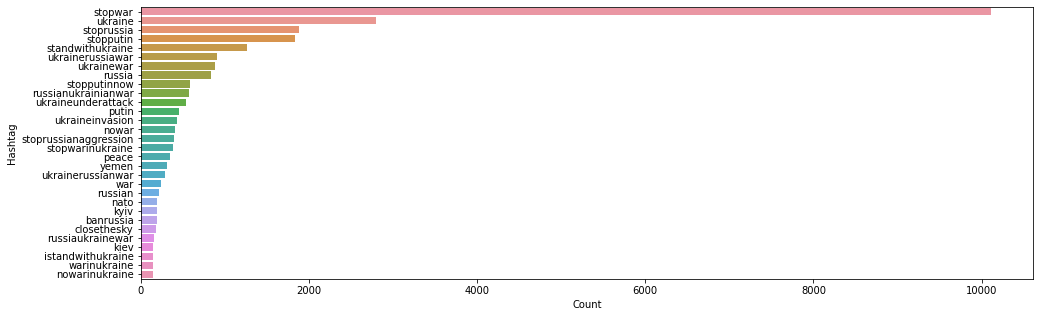

In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import re

def hashtag_extract(data_set):
    hashtags = []
    
    for i in data_set:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

def visualize_most_frequent_hashtag(df):
    HT = hashtag_extract(df)
    HT = sum(HT,[])

    a = nltk.FreqDist(HT) #method1
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                    'Count': list(a.values())})

    # selecting top 20 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 30) 
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=d, y= "Hashtag", x = "Count")
    ax.set(xlabel = 'Count')
    return plt.show()

#visualize the most frequent hashtag
visualize_most_frequent_hashtag(data_set["Text"])

## Sentiment Analysis

In [ ]:
# get polarity of the text
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# get subjectivity of the text
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# apply function to clean_text column
data_set['Polarity'] = data_set['clean_text'].apply(get_polarity)
data_set['Subjectivity'] = data_set['clean_text'].apply(getsubjectivity)

In [ ]:
# categorizing polarity into positivive, neutral and negative
##
def categorize_polarity(pol):
  if pol < 0:
    return 'positive'
  elif pol == 0:
    return 'neutral'
  else:
    return 'negative'


data_set['Sentiment'] = data_set['Polarity'].apply(categorize_polarity)
data_set.head()

,Datetime,Tweet Id,Character Length of Tweet,Word Length of Tweet,Text,Username,clean_text,text_preprocessed,POS tagged,Polarity,Subjectivity,Sentiment
0,2022-03-14 23:59:24+00:00,1503521205873438721,19,19,russia-ukraine talks done for the day; eu agre...,PeterBrandt007,russiaukraine talks done day eu agrees fresh s...,russiaukraine talk agree fresh sanction,"[(r, n), (u, a), (u, a), (k, n), (r, v), (n, n...",0.3,0.5,negative
1,2022-03-14 23:58:28+00:00,1503520971822706692,9,9,it's really heartbreaking! 🙁 rest in peace! #s...,ahmadmarufS,really heartbreaking 🙁 rest peace,really heartbreaking rest peace,"[(r, n), (e, v), (l, n), (l, n), ( , n), (h, n...",0.2,0.2,negative
2,2022-03-14 23:57:40+00:00,1503520771494539264,16,16,to russian people\nplease believe in her\nplea...,galaxys23172864,russian people please believe please stop war,russian people please believe please stop,"[(r, n), (u, a), (n, a), ( , n), (p, n), (e, n...",0.0,0.0,neutral
3,2022-03-14 23:51:55+00:00,1503519323943489550,9,9,@toddyspace i support you 👍\n@nobelprize \n🇺🇦🇪...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦,"[(u, a), (p, n), (p, n), (r, n), ( , n), (🇺, n...",0.0,0.0,neutral
4,2022-03-14 23:51:08+00:00,1503519125330661381,9,9,@innavoa i support you 👍\n@nobelprize \n🇺🇦🇪🇦\n...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦,"[(u, a), (p, n), (p, n), (r, n), ( , n), (🇺, n...",0.0,0.0,neutral


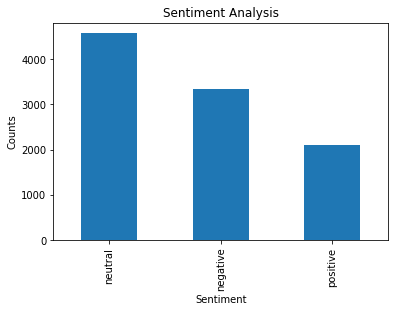

In [ ]:
#Visualize the count

data_set['Sentiment'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data_set['Sentiment'].value_counts().plot(kind='bar')
plt.show()

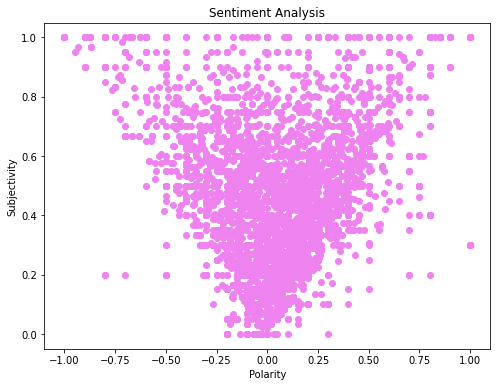

In [ ]:
# Plot Subjectivity and Polarity

plt.figure(figsize=(8,6))
for i in range(0, data_set.shape[0]):
    plt.scatter(data_set['Polarity'][i], data_set['Subjectivity'][i], color='violet')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Emotion Analysis

In [ ]:
#Install package for Emotion Analysis
!pip install text2emotion
#Import the modules
import text2emotion as te

     |████████████████████████████████| 57 kB 3.1 MB/s 
     |████████████████████████████████| 175 kB 13.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=43b6a3837964b4e8fc032069302d17d0949d87a6abd2cdc41ce33da10acf888d
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data_set['Emotion'] = data_set.apply(lambda row: te.get_emotion(row['text_preprocessed']), axis=1)
data_set['Emotion']

0        {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
1        {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ...
2        {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
3        {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
4        {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
                               ...                        
9996     {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...
9997     {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
9998     {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
9999     {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,...
10000    {'Happy': 0.2, 'Angry': 0.2, 'Surprise': 0.0, ...
Name: Emotion, Length: 10001, dtype: object

In [ ]:
data_set.head()

,Datetime,Tweet Id,Text,Username,clean_text,text_preprocessed,Emotion
0,2022-03-14 23:59:24+00:00,1503521205873438721,russia-ukraine talks done for the day; eu agre...,PeterBrandt007,russiaukraine talks done day eu agrees fresh s...,russiaukraine talk agree fresh sanction,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
1,2022-03-14 23:58:28+00:00,1503520971822706692,it's really heartbreaking! 🙁 rest in peace! #s...,ahmadmarufS,really heartbreaking 🙁 rest peace,really heartbreaking rest peace,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ..."
2,2022-03-14 23:57:40+00:00,1503520771494539264,to russian people\nplease believe in her\nplea...,galaxys23172864,russian people please believe please stop war,russian people please believe please stop,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
3,2022-03-14 23:51:55+00:00,1503519323943489550,@toddyspace i support you 👍\n@nobelprize \n🇺🇦🇪...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
4,2022-03-14 23:51:08+00:00,1503519125330661381,@innavoa i support you 👍\n@nobelprize \n🇺🇦🇪🇦\n...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."


In [ ]:
# data_set['Happy']=[dict(i)['Happy'] for i in data_set['Emotion']]
data_set['Angry']=[dict(i)['Angry'] for i in data_set['Emotion']]
data_set['Surprise']=[dict(i)['Surprise'] for i in data_set['Emotion']]
data_set['Sad']=[dict(i)['Sad'] for i in data_set['Emotion']]
data_set['Fear']=[dict(i)['Fear'] for i in data_set['Emotion']]
dominant=[]
for i in data_set['Emotion']:
    p=dict(i)
    Keymax = max(p, key=p.get)
    dominant.append(Keymax)
data_set['DominantEmotion'] = dominant

In [ ]:
data_set.head()

,Datetime,Tweet Id,Text,Username,clean_text,text_preprocessed,Emotion,Angry,Surprise,Sad,Fear,DominantEmotion
0,2022-03-14 23:59:24+00:00,1503521205873438721,russia-ukraine talks done for the day; eu agre...,PeterBrandt007,russiaukraine talks done day eu agrees fresh s...,russiaukraine talk agree fresh sanction,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,Happy
1,2022-03-14 23:58:28+00:00,1503520971822706692,it's really heartbreaking! 🙁 rest in peace! #s...,ahmadmarufS,really heartbreaking 🙁 rest peace,really heartbreaking rest peace,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ...",0.0,1.0,0.0,0.0,Surprise
2,2022-03-14 23:57:40+00:00,1503520771494539264,to russian people\nplease believe in her\nplea...,galaxys23172864,russian people please believe please stop war,russian people please believe please stop,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,1.0,0.0,Sad
3,2022-03-14 23:51:55+00:00,1503519323943489550,@toddyspace i support you 👍\n@nobelprize \n🇺🇦🇪...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,Happy
4,2022-03-14 23:51:08+00:00,1503519125330661381,@innavoa i support you 👍\n@nobelprize \n🇺🇦🇪🇦\n...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,Happy


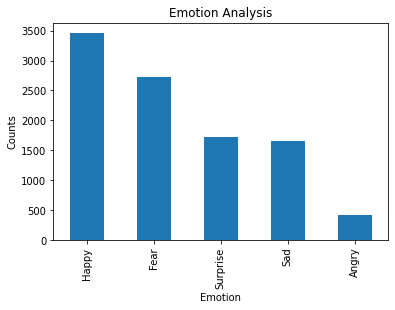

In [ ]:
#Visualize the count
import matplotlib.pyplot as plt
data_set['DominantEmotion'].value_counts()

plt.title('Emotion Analysis')
plt.xlabel('Emotion')
plt.ylabel('Counts')
data_set['DominantEmotion'].value_counts().plot(kind='bar')
plt.show()

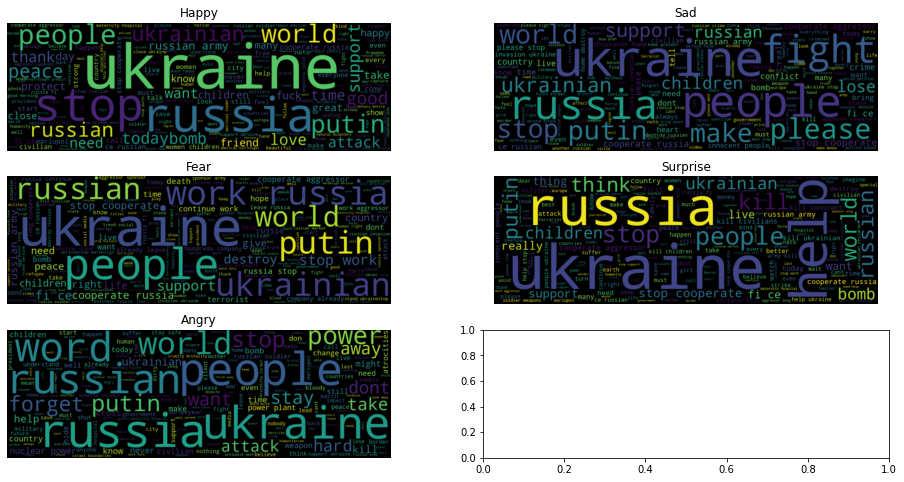

In [ ]:
# Wordplot 
fig, ax = plt.subplots(3, 2, figsize=(16, 8))
k=0
j=0
for i in ['Happy', 'Sad','Fear','Surprise','Angry']:
    dd=data_set[data_set['DominantEmotion']==i]
    text=" ".join(dd['text_preprocessed'])
    text=text.replace("stock",' ')
    text=text.replace("GME"," ")
    text=text.replace("nan",' ')
    wordcloud = WordCloud(width=1500, height=500).generate(text)

    ax[k,j].imshow(wordcloud, interpolation='bilinear')
    ax[k,j].set_title(i)
    ax[k, j].set_axis_off()
    j+=1
    if j>1:
        k+=1
        j=0

# Machine Learning Models

## LDA Topic Modelling 

In [ ]:
# Packages for LSI
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
print(data_set.columns)
print(data_set.shape)

Index(['Datetime', 'Tweet Id', 'Character Length of Tweet',
       'Word Length of Tweet', 'Text', 'Username', 'clean_text',
       'text_preprocessed', 'POS tagged', 'Polarity', 'Subjectivity',
       'Sentiment', 'Emotion', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear',
       'DominantEmotion'],
      dtype='object')
(10001, 19)


In [ ]:
data_set['text_preprocessed'].head()

0      russiaukraine talk agree fresh sanction
1              really heartbreaking rest peace
2    russian people please believe please stop
3                                 support 🇺🇦🇪🇦
4                                 support 🇺🇦🇪🇦
Name: text_preprocessed, dtype: object

In [ ]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def tokenize(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_tokens = [w for w in word_tokens if not w in stop_words if len(w) > 2]
    return filtered_tokens

vectorizer = TfidfVectorizer(tokenizer=tokenize, use_idf=True,smooth_idf=True)

svd_model = TruncatedSVD(n_components=10, algorithm='randomized',n_iter=10)

svd_transformer = Pipeline([('tfidf', vectorizer), ('svd', svd_model)])

svd_matrix = svd_transformer.fit_transform(data_set.text_preprocessed)

tfidf = svd_transformer.steps[0][-1]
voc = tfidf.get_feature_names()

features_names = np.array(voc)

sorting = np.argsort(svd_model.components_, axis=1)[:, ::-1]

mglearn.tools.print_topics(topics=range(10), feature_names=features_names,
                           sorting=sorting, topics_per_chunk=5, n_words=50)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
stop          stop          ukraine       stop          ukraine       
russia        🇺🇦🇺🇦🇺🇦        stand         russian       stand         
cooperate     work          people        please        wardesign     
russian       russia        putin         cooperate     ukrainestop   
ukraine       presse        world         putin         cooperate     
aggressor     france        peace         help          tshirt        
work          dada          stop          world         finance       
kill          cheat         support       terror        🇺🇦🇺🇦🇺🇦        
army          palestinian   help          close         invasion      
finance       madness       wardesign     peace         thousands     
🇺🇦🇺🇦🇺🇦        war🇺🇦🌎        ukrainestop   need          aggressor     
people        awesome       🇺🇦🇺🇦🇺🇦        cheat         russia        
sponso

Data Split 

In [ ]:
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [ ]:
def new(pol):
  if pol < 0:
    return '1'
  else:
    return '0'

data_set['label'] = data_set['Polarity'].apply(new)
data_set.head()

,Datetime,Tweet Id,Character Length of Tweet,Word Length of Tweet,Text,Username,clean_text,text_preprocessed,POS tagged,Polarity,Subjectivity,Sentiment,Emotion,Happy,Angry,Surprise,Sad,Fear,DominantEmotion,label
0,2022-03-14 23:59:24+00:00,1503521205873438721,19,19,russia-ukraine talks done for the day; eu agre...,PeterBrandt007,russiaukraine talks done day eu agrees fresh s...,russiaukraine talk agree fresh sanction,"[(r, n), (u, a), (u, a), (k, n), (r, v), (n, n...",0.3,0.5,negative,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,0.0,Happy,0
1,2022-03-14 23:58:28+00:00,1503520971822706692,9,9,it's really heartbreaking! 🙁 rest in peace! #s...,ahmadmarufS,really heartbreaking 🙁 rest peace,really heartbreaking rest peace,"[(r, n), (e, v), (l, n), (l, n), ( , n), (h, n...",0.2,0.2,negative,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ...",0.0,0.0,1.0,0.0,0.0,Surprise,0
2,2022-03-14 23:57:40+00:00,1503520771494539264,16,16,to russian people\nplease believe in her\nplea...,galaxys23172864,russian people please believe please stop war,russian people please believe please stop,"[(r, n), (u, a), (n, a), ( , n), (p, n), (e, n...",0.0,0.0,neutral,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.0,1.0,0.0,Sad,0
3,2022-03-14 23:51:55+00:00,1503519323943489550,9,9,@toddyspace i support you 👍\n@nobelprize \n🇺🇦🇪...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦,"[(u, a), (p, n), (p, n), (r, n), ( , n), (🇺, n...",0.0,0.0,neutral,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,0.0,Happy,0
4,2022-03-14 23:51:08+00:00,1503519125330661381,9,9,@innavoa i support you 👍\n@nobelprize \n🇺🇦🇪🇦\n...,ZOTILO2,support 👍 🇺🇦🇪🇦,support 🇺🇦🇪🇦,"[(u, a), (p, n), (p, n), (r, n), ( , n), (🇺, n...",0.0,0.0,neutral,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.0,0.0,0.0,0.0,0.0,Happy,0


In [ ]:
#stemming and removing stop-words
stemmer=PorterStemmer()
def stem_remove_sw(df,text_col):
    corpus = []
    for i in range(len(df)):
        review = str(df[text_col][i])
        review = review.split()
        review = [stemmer.stem(word) for word in review if word not in stop]
        review = " ".join(review)
        corpus.append(review)
    return corpus

In [ ]:
train_corpus = stem_remove_sw(data_set, 'text_preprocessed')
train_corpus[0]

'russiaukrain talk agre fresh sanction'

In [ ]:
#tfidf vectorizer
tfv=TfidfVectorizer()
X=tfv.fit_transform(train_corpus).toarray()
Y=data_set["label"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

## Multinomial Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)
y_pred = nb.predict(X_test)
y_pred[0]

'0'

In [ ]:
acc_nb = accuracy_score(y_pred, Y_test)
print("Accuracy of Naive Bayes is: ",acc_nb )
print("Confusion Matrix: \n", confusion_matrix(y_pred, Y_test))

Accuracy of Naive Bayes is:  0.8018782187215995
Confusion Matrix: 
 [[2601  651]
 [   3   46]]


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2604
           1       0.94      0.07      0.12       697

    accuracy                           0.80      3301
   macro avg       0.87      0.53      0.51      3301
weighted avg       0.83      0.80      0.73      3301



## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred1 = lr.predict(X_test)
acc_lr = accuracy_score(y_pred1, Y_test)
print("Accuracy of LR is: ",acc_lr )
print("Confusion Matrix: \n", confusion_matrix(y_pred1, Y_test))

Accuracy of LR is:  0.8388367161466223
Confusion Matrix: 
 [[2586  514]
 [  18  183]]


In [ ]:
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      2604
           1       0.91      0.26      0.41       697

    accuracy                           0.84      3301
   macro avg       0.87      0.63      0.66      3301
weighted avg       0.85      0.84      0.80      3301



## Linear SVC

In [ ]:
svc = LinearSVC()
svc.fit(X_train, Y_train)
y_pred2 = svc.predict(X_test)
acc_svc = accuracy_score(y_pred2, Y_test)
print("Accuracy of Naive Bayes is: ", acc_svc)
print("Confusion Matrix: \n", confusion_matrix(y_pred2, Y_test))

Accuracy of Naive Bayes is:  0.8806422296273856
Confusion Matrix: 
 [[2516  306]
 [  88  391]]


In [ ]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2604
           1       0.82      0.56      0.66       697

    accuracy                           0.88      3301
   macro avg       0.85      0.76      0.80      3301
weighted avg       0.88      0.88      0.87      3301



# Comparing models

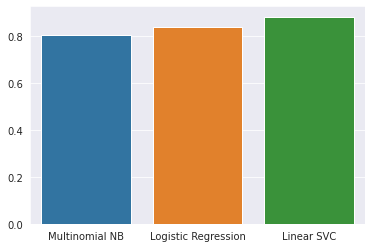

In [ ]:
models = ['Multinomial NB', 'Logistic Regression', 'Linear SVC']
model_acc = [acc_nb, acc_lr, acc_svc]
sns.set_style("darkgrid")
sns.barplot(x = models, y=model_acc)
# plt.grid()
plt.show()